<a href="https://colab.research.google.com/github/nineto1/sc1_project/blob/main/AI_05_%EC%9D%B4%EA%B3%84%ED%98%84_Setion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install scipy --upgrade

import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy import stats

def toNumeric(String) :
  p = re.compile('[a-zA-Z]+')
  m = p.search(String)    
  if m :
    temp = String[:m.start()] + String[m.end():]    
    result = float(temp)
    if m.group() == 'M' :
      result = result * 1000    
    return result
  else : 
    return float(String)

# data preprocessing
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv")
df['NA_Sales'] = df['NA_Sales'].apply(toNumeric)
df['EU_Sales'] = df['EU_Sales'].apply(toNumeric)
df['JP_Sales'] = df['JP_Sales'].apply(toNumeric)
df['Other_Sales'] = df['Other_Sales'].apply(toNumeric)
df['Year'] = df['Year'].apply(lambda x : x+2000 if x <= 21 else x+1900 if x < 100 else x)

df['Sales_sum'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Publisher'] = df['Publisher'].fillna(value = 'Unknown')
df = df.dropna()

df = df[df['Year'] >= 2010]
df.isna().sum()

df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08
...,...,...,...,...,...,...,...,...,...,...,...
16581,16582,LEGO The Hobbit,XOne,2014.0,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
16588,16589,MindJack,PS3,2011.0,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.18
16590,16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Sales_sum
Genre                                                             
Action        12264.44   3691.53    769.69       417.49   17143.15
Adventure        40.62     89.00     75.26         5.84     210.72
Fighting       1057.54     90.70    383.38         8.45    1540.07
Misc            632.72    923.56     21.45       140.08    1717.81
Platform       1234.29   1567.16    465.30       170.68    3437.43
Puzzle            9.39     56.73      3.40        11.61      81.13
Racing         1953.71     55.52      6.65       345.53    2361.41
Role-Playing    671.83    229.55   1444.75       952.16    3298.29
Shooter       11276.57   4821.78     53.50       434.65   16586.50
Simulation       26.69     55.35     13.20         6.00     101.24
Sports         3141.04   3342.40     15.34       688.63    7187.41
Strategy        832.49     22.39      6.60       283.22    1144.70
pvalue of 2sample chi :  0.0
F_onewayResult(statistic=3.022709

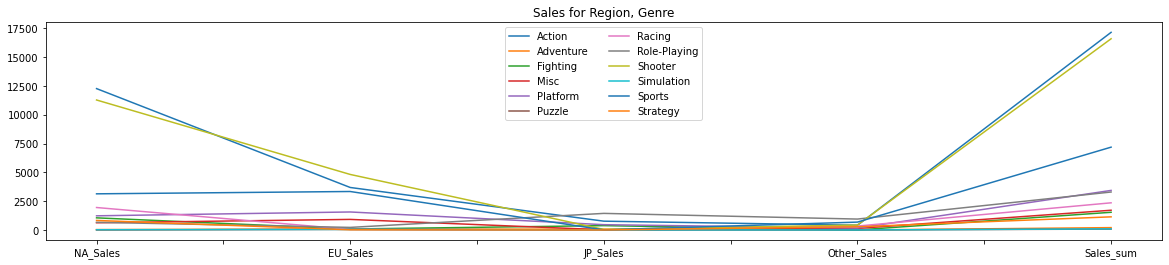

          NA_Sales  EU_Sales  JP_Sales  Other_Sales  Sales_sum
Platform                                                      
PSV         615.47     96.19     80.78        58.36     850.80
Wii        1473.13   1134.50    794.48       158.01    3560.12
WiiU       1217.14    693.56     12.79         6.45    1929.94
X360      19583.26   5815.50     35.42       896.17   26330.35
XOne       1961.31   1574.10      0.34        21.91    3557.66
pvalue of 2sample chi :  0.0
F_onewayResult(statistic=2.017754712655943, pvalue=0.12525739704110564)


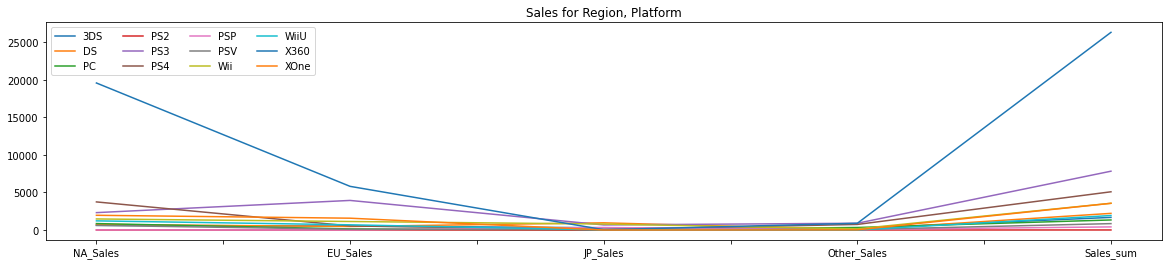

In [44]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import matplotlib.pyplot as plt


# Genre, 지역별 출고량 차이에 대한 연관성을 알아보기 위해 카이제곱 Test 수행.
data = df.groupby(by = ['Genre']).sum()
data = data.filter(items = ['NA_Sales', 'EU_Sales', 'JP_Sales',  'Other_Sales', 'Sales_sum'])
print(data)
chi_val = chi2_contingency(data[data.columns[0:4]], correction = False)
print("pvalue of 2sample chi : ", chi_val[1])

# 지역별, Genre 에 대한 출고량 분산의 차이 확인을 위해 Anova 수행.
anova_result = f_oneway(data['NA_Sales'], data['EU_Sales'], data['JP_Sales'], data['Other_Sales']) 
print(anova_result)

# 지역별, Genre 출고량 그래프
lines = data.T.plot.line(figsize = (20, 4))
plt.title('Sales for Region, Genre')
plt.legend(ncol = 2)
plt.show()

# 지역별, Platform 별 출고량 분석
data = df.groupby(by = ['Platform']).sum()
data = data.filter(items = ['NA_Sales', 'EU_Sales', 'JP_Sales',  'Other_Sales', 'Sales_sum'])
print(data.tail())

chi_val = chi2_contingency(data[data.columns[0:4]], correction = False)
print("pvalue of 2sample chi : ", chi_val[1])

# 지역별, Platform 에 대한 출고량 분산의 차이 확인을 위해 Anova 수행.
anova_result = f_oneway(data['NA_Sales'], data['EU_Sales'], data['JP_Sales'], data['Other_Sales']) 
print(anova_result)

# 지역별, Genre 출고량 그래프
lines = data.T.plot.line(figsize = (20, 4))
plt.title('Sales for Region, Platform')
plt.legend(ncol = 4)
plt.show()

        NA_Sales  EU_Sales  JP_Sales  Other_Sales  Sales_sum
Year                                                        
2010.0   8973.36   1391.93   1575.46       878.32   12819.07
2011.0   3137.53   3034.43    152.88       503.88    6828.72
2012.0   3111.65   3195.18    740.95       127.51    7175.29
2013.0  14165.57   4337.53    402.89      1137.93   20043.92
2014.0    521.58   2453.32    199.30        69.99    3244.19
pvalue of 2sample chi :  0.0
F_onewayResult(statistic=3.358564538976819, pvalue=0.030768869393490023)


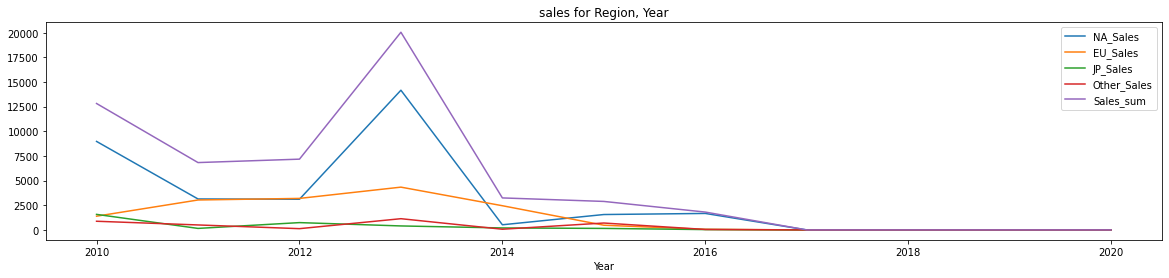

In [45]:
# 연도별 지역 출고량 차이를 확인하기 위해 카이제곱 수행.
data = df.groupby(by = ['Year']).sum()
data = data.filter(items = ['NA_Sales', 'EU_Sales', 'JP_Sales',  'Other_Sales', 'Sales_sum'])
sales_year = data['Sales_sum']

print(data.head())
chi_val = chi2_contingency(data[data.columns[0:4]], correction = False)
print("pvalue of 2sample chi : ", chi_val[1])

anova_result = f_oneway(data['NA_Sales'], data['EU_Sales'], data['JP_Sales'], data['Other_Sales']) 
print(anova_result)

# 연도, 지역별 출고량 시각화
lines = data.plot.line(figsize = (20, 4))
plt.title('sales for Region, Year')
plt.show()


Genre   Action  Adventure  Fighting  ...  Simulation  Sports  Strategy
Year                                 ...                              
2014.0     186         75        23  ...          11      55         8
2015.0     253         53        21  ...          15      62        17
2016.0     119         34        14  ...           9      38        10
2017.0       1          0         0  ...           0       0         0
2020.0       0          0         0  ...           1       0         0

[5 rows x 12 columns]
p-value of 2sample chisquare :  2.3459367608005885e-61


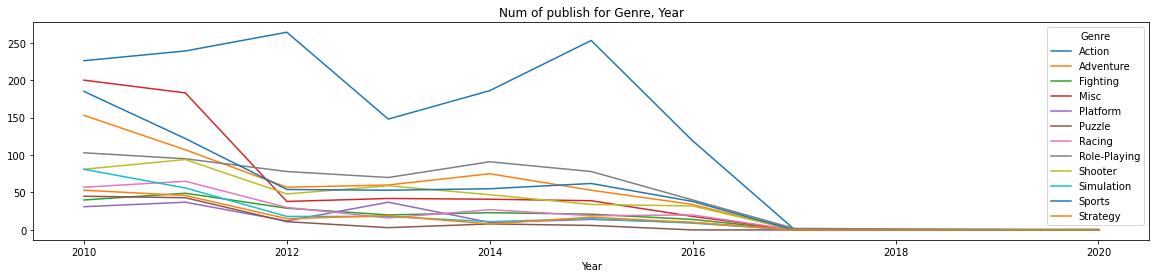

Genre     Action  Adventure  Fighting  ...  Simulation   Sports  Strategy
Year                                   ...                               
2010.0    427.19      66.52     14.88  ...       52.03  1480.63    113.72
2011.0    538.58      15.88    691.44  ...       15.33  1775.34      9.03
2012.0   5255.67       5.90    578.96  ...       13.37    90.84      3.33
2013.0  10165.16      36.58      7.23  ...        8.68  3028.55   1015.31
2014.0    168.94      56.04    215.95  ...        5.54   176.51      0.97

[5 rows x 12 columns]
p-value of 2sample chisquare :  0.0
F_onewayResult(statistic=2.4293782871929137, pvalue=0.028497396963561288)


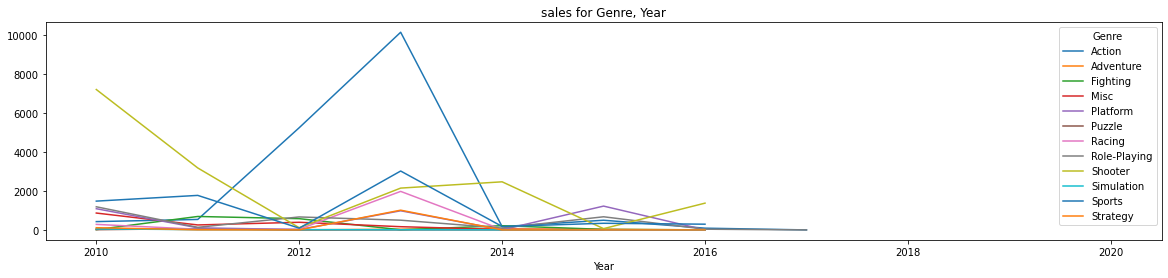

In [46]:
# 연도, 장르별 출시량 분석
data = df.groupby(by = ['Year', 'Genre']).sum()
data = data.filter(items = ['NA_Sales', 'EU_Sales', 'JP_Sales',  'Other_Sales', 'Sales_sum'])

crosstab = pd.crosstab(df['Year'], df['Genre'])
print(crosstab.tail())
chi_val = chi2_contingency(crosstab, correction = False)
print('p-value of 2sample chisquare : ',chi_val[1])
line1 = crosstab.plot.line(figsize = (20, 4))
plt.title('Num of publish for Genre, Year')
plt.show()

# 연도, 장르별 출고량 분석
raw_year_genre = data.pivot_table(index = 'Year', columns = 'Genre', values = 'Sales_sum')

year_genre = raw_year_genre.fillna(0).copy()
print(year_genre.head())
chi_val = chi2_contingency(year_genre, correction = False)
print('p-value of 2sample chisquare : ',chi_val[1])

anova_result = f_oneway(year_genre['Action'], year_genre['Adventure'], year_genre['Fighting'], 
                        year_genre['Misc'], year_genre['Platform'], year_genre['Puzzle'], 
                        year_genre['Racing'], year_genre['Shooter'])
print(anova_result)

line2 = raw_year_genre.plot.line(figsize = (20, 4))
plt.title('sales for Genre, Year')
plt.show()




Platform   3DS   DS  PC  PS2  PS3  PS4  PSP  PSV  Wii  WiiU  X360  XOne
Genre                                                                  
Action     180  101  99    6  274  121  104  142   89    63   189    68
Adventure   36   59  32   14   61   19  164   85   21     3    34    11
Fighting    14    6   4    3   56   17   21   16    8     5    39     7
Misc        53  107  11    3   71   15   40   24  128    21    73    15
Platform    28   19   6    2   22   11    3   10   20    16    10     4
p-value of 2sample chisquare :  0.0


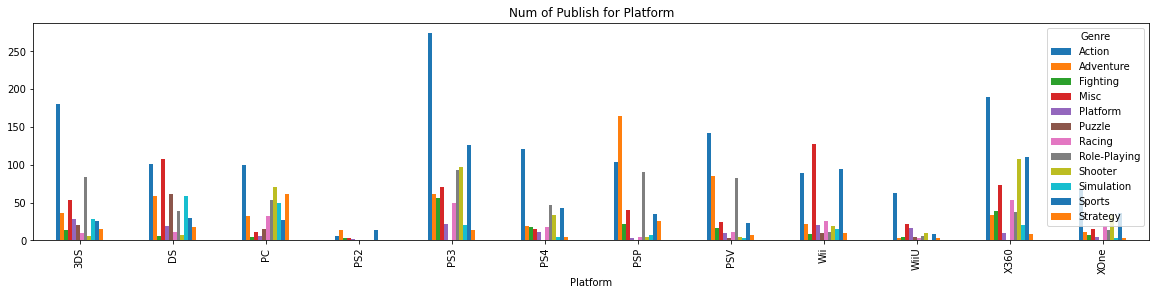

Platform         3DS      DS       PC   PS2  ...      Wii  WiiU      X360     XOne
Genre                                        ...                                  
Role-Playing  460.94  965.90    28.41  0.02  ...     4.32  2.44    737.48     9.46
Shooter         1.23    1.42    24.38  0.06  ...     4.61  6.16  10390.70  1799.84
Simulation     26.63    9.79    14.63  0.00  ...    33.68  0.21      7.62     0.54
Sports         56.13    3.59    67.08  2.86  ...  1027.88  3.31   3411.49    23.98
Strategy        2.07    4.63  1096.08  0.00  ...     1.77  1.24     32.05     0.39

[5 rows x 12 columns]
p-value of 2sample chisquare :  0.0


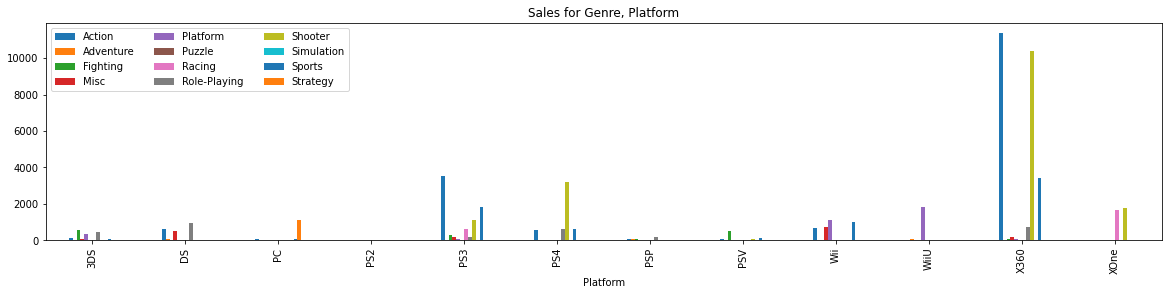

Platform  3DS  DS  PC  PS2  PS3  PS4  PSP  PSV  Wii  WiiU  X360  XOne
Year                                                                 
2014.0     79   1  44    0  108   75   10  102    6    31    65    61
2015.0     86   0  50    0   73  136    3  113    4    28    40    78
2016.0     35   0  38    0   32  107    0   60    0    10     8    54
2017.0      0   0   0    0    0    1    0    2    0     0     0     0
2020.0      0   1   0    0    0    0    0    0    0     0     0     0
p-value of 2sample chisquare :  0.0


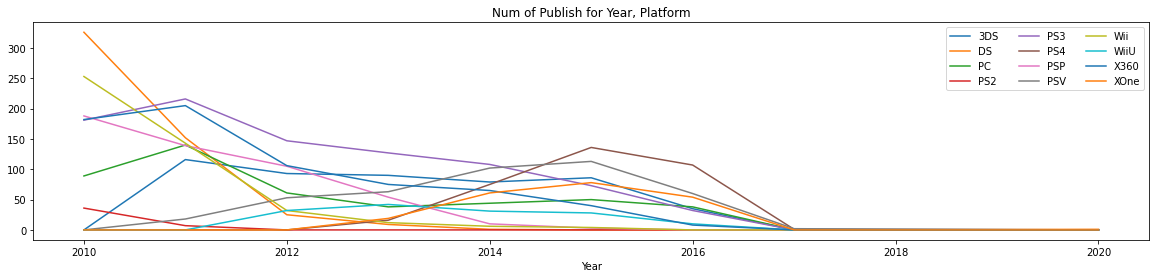

Platform     3DS       DS       PC   PS2  ...      Wii    WiiU      X360     XOne
Year                                      ...                                    
2010.0      0.00  1186.92    94.31  5.12  ...  2800.61    0.00   7963.15     0.00
2011.0    711.93    67.72   115.11  0.45  ...   251.83    0.00   3521.16     0.00
2012.0    160.99   960.65    23.50  0.00  ...   352.45   17.79   2158.76     0.00
2013.0    640.91     1.96  1081.73  0.00  ...   149.24  641.19  12637.00  1676.95
2014.0     43.12     0.02    13.33  0.00  ...     4.43   72.49     36.43  1800.69

[5 rows x 12 columns]
p-value of 2sample chisquare :  0.0
F_onewayResult(statistic=2.7567739853491013, pvalue=0.04085659242816164)


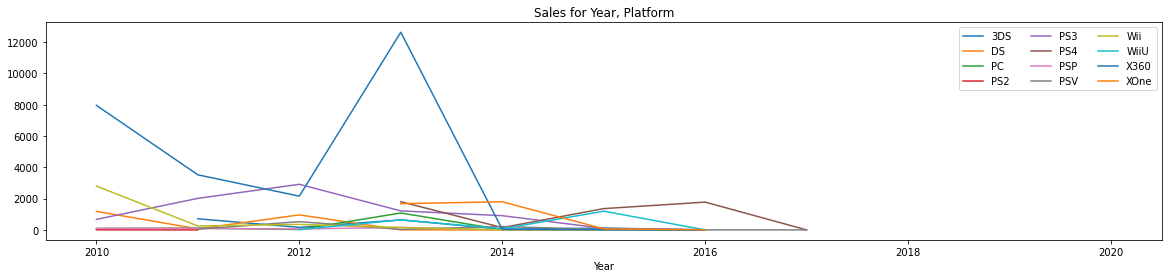

In [47]:
data = df.groupby(by = ['Genre', 'Platform']).sum()

# 장르, 플랫폼에 따른 출시량 분석
crosstab = pd.crosstab(df['Genre'], df['Platform'])
print(crosstab.head())

chi_val = chi2_contingency(crosstab, correction = False)
print('p-value of 2sample chisquare : ',chi_val[1])
line = crosstab.T.plot.bar(figsize = (20, 4))
plt.title('Num of Publish for Platform')
plt.show()

# 장르, 플랫폼에 따른 출고량 분석
raw_genre_platform = data.pivot_table(index = 'Genre', columns = 'Platform', values = 'Sales_sum')
genre_platform = raw_genre_platform.fillna(0).copy()
print(genre_platform.tail())
chi_val = chi2_contingency(genre_platform, correction = False)
print('p-value of 2sample chisquare : ',chi_val[1])

line1 = raw_genre_platform.T.plot.bar(figsize = (20, 4))
plt.title('Sales for Genre, Platform')
plt.legend(ncol = 3)
plt.show()

# 연도, 플랫폼에 따른 출시량 분석
data = df.groupby(by = ['Year', 'Platform']).sum()
crosstab = pd.crosstab(df['Year'], df['Platform'])
print(crosstab.tail())

chi_val = chi2_contingency(crosstab, correction = False)
print('p-value of 2sample chisquare : ',chi_val[1])

line2 = crosstab.plot.line(figsize = (20, 4))
plt.legend(ncol = 3)
plt.title('Num of Publish for Year, Platform')
plt.show()


# 연도, 플랫폼에 따른 출고량.
raw_year_platform = data.pivot_table(index = 'Year', columns = 'Platform', values = 'Sales_sum')
year_platform = raw_year_platform.fillna(0).copy()
print(year_platform.head())
chi_val = chi2_contingency(year_platform, correction = False)
print('p-value of 2sample chisquare : ',chi_val[1])
anova_result = f_oneway(year_platform['X360'], year_platform['PS4'], year_platform['Wii'], year_platform['PC'], year_platform['DS'])
print(anova_result)

line3 = raw_year_platform.plot.line(figsize = (20, 4))
plt.legend(ncol = 3)
plt.title('Sales for Year, Platform')
plt.show()

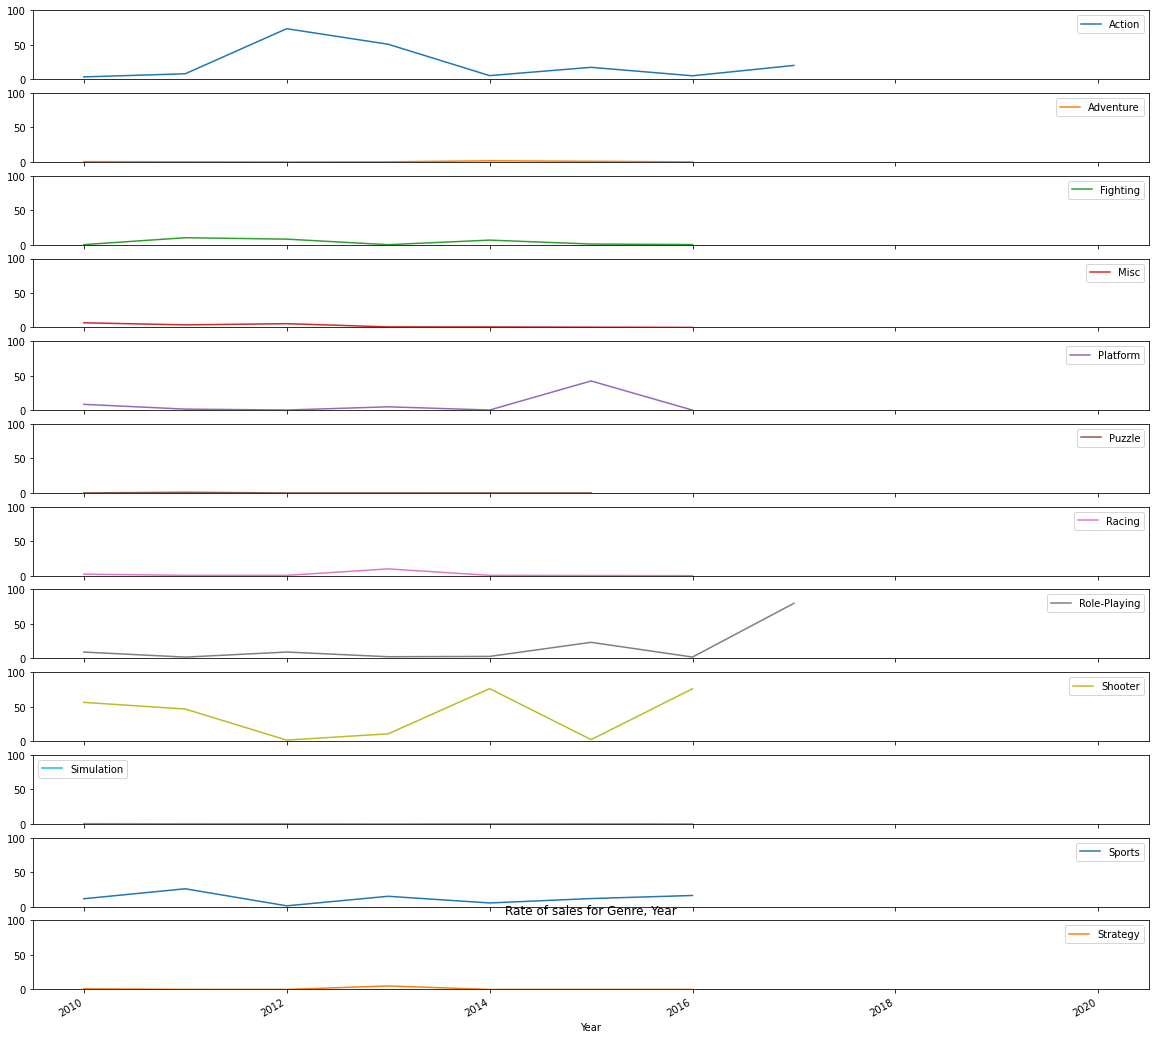

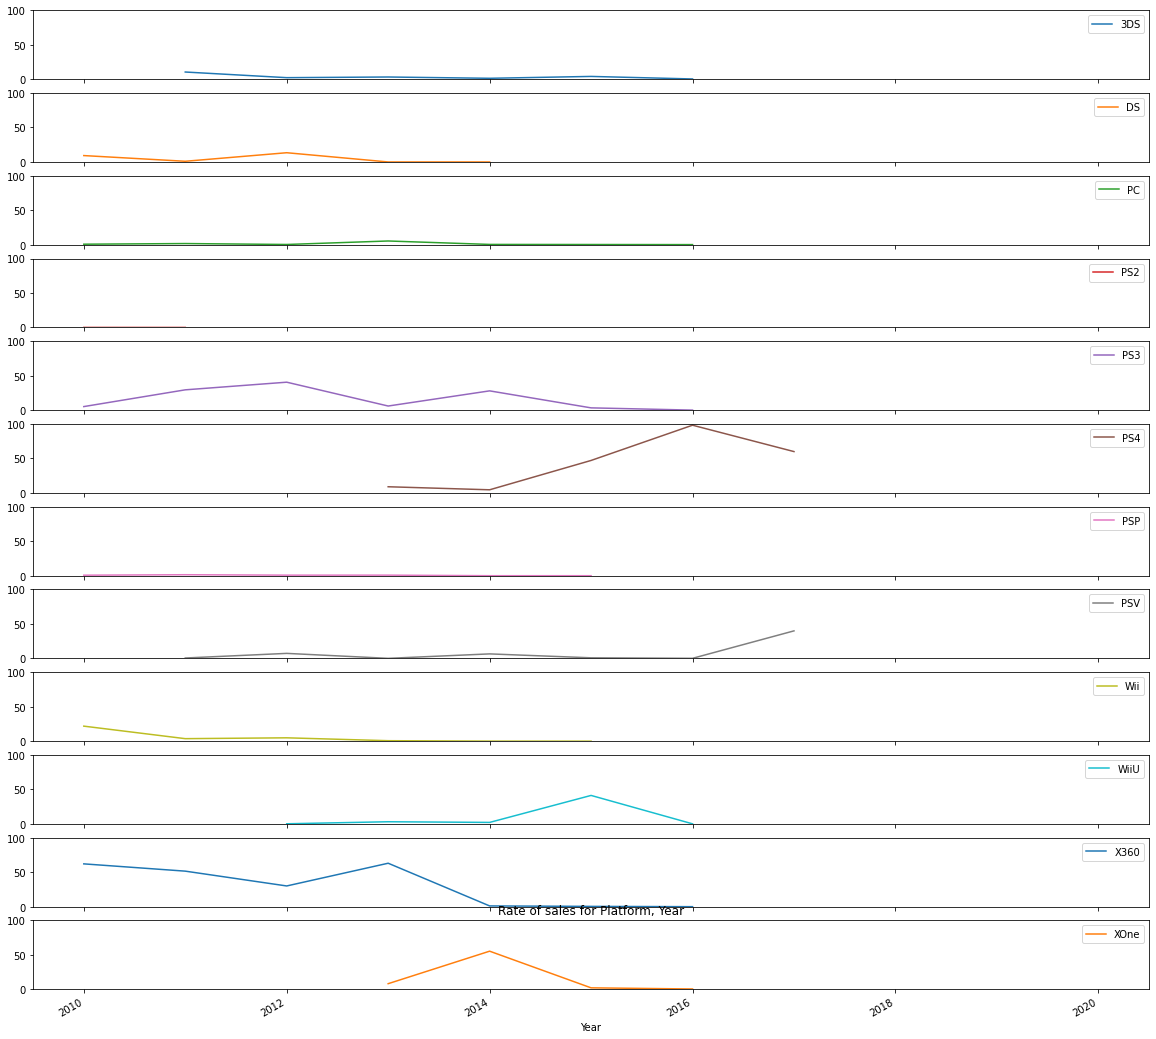

In [48]:
# 연도, 장르별 출고량 비율.
rate_genre = raw_year_genre.copy()
for col in rate_genre.columns :
  rate_genre[col] = (rate_genre[col]/sales_year) *100

line1 = rate_genre.plot.line(figsize = (20, 20), subplots = True, ylim = (0, 100))
plt.title('Rate of sales for Genre, Year')
plt.legend(ncol = 3)
plt.show()


# 연도, 플랫폼별 출고량 비율.
rate_platform = raw_year_platform.copy()

for col in rate_platform.columns :
  rate_platform[col] = (rate_platform[col]/sales_year) *100

line2 = rate_platform.plot.line(figsize = (20, 20), subplots = True, ylim = (0, 100))
plt.title('Rate of sales for Platform, Year')
plt.legend(ncol = 3)
plt.show()


In [49]:
# 년도별 출고비율이 높은 Genre 와 Platform list
list_genre_max_rate = rate_genre.idxmax(axis="columns")
list_platform_max_rate = rate_platform.idxmax(axis="columns")

# 출고비율이 높은 Genre 와 Platform 빈도 crosstab
genre_platform = pd.crosstab(list_genre_max_rate, list_platform_max_rate)
print(genre_platform)

group = []
idx_col = []

# one tailed ttest
def select_lower_mean(group1, group2, default) :
  result1 = stats.ttest_ind(group1, group2, alternative = 'greater').pvalue
  result2 = stats.ttest_ind(group2, group1, alternative = 'greater').pvalue
  print(result1, result2)
  if result1 < 0.05 :
    return 1
  elif result2 < 0.05 :
    return 0
  else :
    return default

# cross tab 에 대해 one tailed ttest 수행.
for idx in genre_platform.index :  
  for col in genre_platform.columns :
    if genre_platform.loc[idx, col] != 0 :
      data = df[df['Genre'] == idx]
      data = data[data['Platform'] == col]
      group.append(data['Sales_sum'])
      idx_col.append([idx, col])

      if len(group) == 2 :
        print(idx_col)
        result = select_lower_mean(group[0], group[1], 1)
        group.pop(result)
        idx_col.pop(result)

print('\n')
print('selected Genre, Platform', idx_col)


col_0         DS  PS3  PS4  X360  XOne
row_0                                 
Action         0    1    0     1     0
Platform       0    0    1     0     0
Role-Playing   0    0    1     0     0
Shooter        0    0    1     2     1
Simulation     1    0    0     0     0
[['Action', 'PS3'], ['Action', 'X360']]
0.8587615370849685 0.1412384629150315
[['Action', 'PS3'], ['Platform', 'PS4']]
0.3981595193863008 0.6018404806136992
[['Action', 'PS3'], ['Role-Playing', 'PS4']]
0.5157254420142634 0.48427455798573665
[['Action', 'PS3'], ['Shooter', 'PS4']]
0.990199773613628 0.009800226386372048
[['Shooter', 'PS4'], ['Shooter', 'X360']]
0.505434434263365 0.494565565736635
[['Shooter', 'PS4'], ['Shooter', 'XOne']]
0.3084909939371484 0.6915090060628516
[['Shooter', 'PS4'], ['Simulation', 'DS']]
0.027920124359427333 0.9720798756405726


selected Genre, Platform [['Shooter', 'PS4']]


In [50]:
# 출고량이 가장 많은 게임 10.
df = df.sort_values(by = ['Sales_sum'], ascending=False)
df.head(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
10913,10914,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630.00,5.31,0.06,1.38,9636.75
12600,12601,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030.00,1.98,0.08,0.78,7032.84
7865,7866,FIFA 14,X360,2013.0,Sports,Electronic Arts,0.92,2930.00,0.01,0.46,2931.39
1629,1630,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2560.00,0.16,1.14,2563.94
8010,8011,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2130.00,0.06,0.69,2135.21
9791,9792,Call of Duty: Ghosts,PS4,2013.0,Shooter,Activision,1780.00,1.42,0.05,0.38,1781.85
6929,6930,NBA 2K12,PS3,2011.0,Sports,Take-Two Interactive,1610.00,0.27,0.05,0.18,1610.50
15314,15315,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,Activision,3.21,1530.00,0.01,0.38,1533.60
4010,4011,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1300.00,2.07,0.18,0.65,1302.90
5296,5297,Forza Motorsport 5,XOne,2013.0,Racing,Microsoft Game Studios,1210.00,0.78,0.01,0.17,1210.96


         Unnamed: 0  Name  Platform  ...  Other_Sales  Sales_sum  Num_Genre
Genre                                ...                                   
Action            2     2         2  ...            2          2          2
Racing            1     1         1  ...            1          1          1
Shooter           5     5         5  ...            5          5          5
Sports            2     2         2  ...            2          2          2

[4 rows x 11 columns]


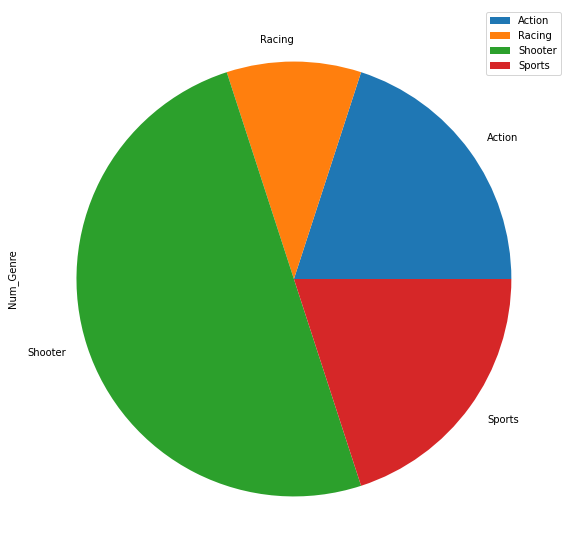

          Unnamed: 0  Name  Year  ...  Other_Sales  Sales_sum  Num_Platform
Platform                          ...                                      
PS3                2     2     2  ...            2          2             2
PS4                2     2     2  ...            2          2             2
X360               4     4     4  ...            4          4             4
XOne               2     2     2  ...            2          2             2

[4 rows x 11 columns]


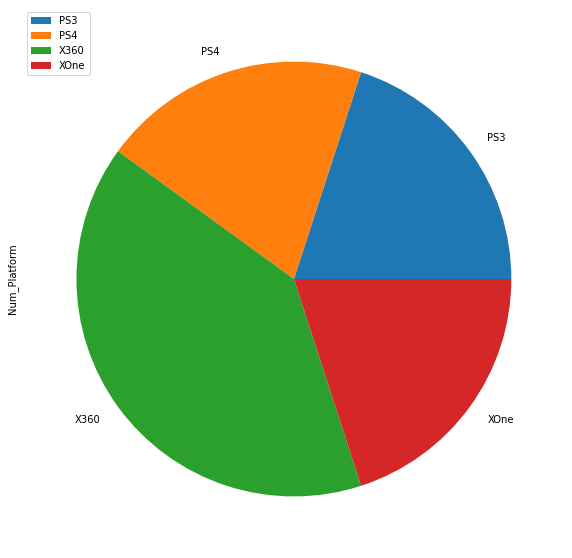

                  Unnamed: 0  Name  Year  ...  Other_Sales  Sales_sum  Number
Genre   Platform                          ...                                
Action  PS3                1     1     1  ...            1          1       1
        X360               1     1     1  ...            1          1       1
Racing  XOne               1     1     1  ...            1          1       1
Shooter PS4                2     2     2  ...            2          2       2
        X360               2     2     2  ...            2          2       2
        XOne               1     1     1  ...            1          1       1
Sports  PS3                1     1     1  ...            1          1       1
        X360               1     1     1  ...            1          1       1

[8 rows x 10 columns]


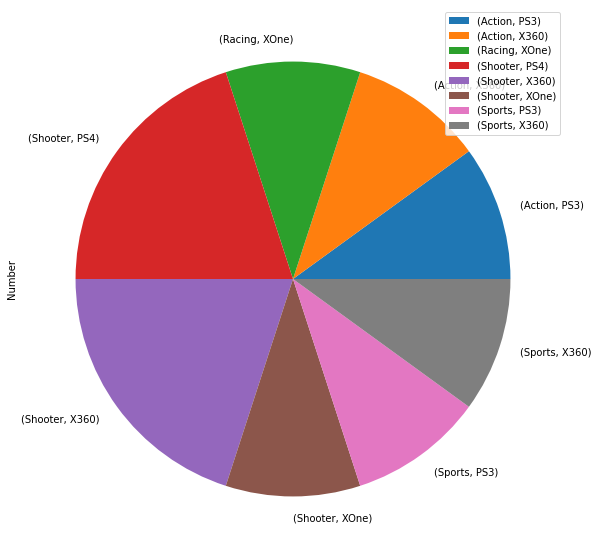

In [51]:
# 게임순위 10 에 대한 Genre Pie chart
data = df.head(10)
count = data.groupby(by = ['Genre']).count()
count['Num_Genre'] = count['Name']
print(count)
pie = count.plot.pie(y = 'Num_Genre', figsize = (10,10))
plt.show()

# 게임순위 10 에 대한 Platform Pie chart 
count = data.groupby(by = ['Platform']).count()
count['Num_Platform'] = count['Name']
print(count)
pie = count.plot.pie(y = 'Num_Platform', figsize = (10,10))
plt.show()

# 게임순위 10 에 대한 Genre, Platform Pie chart 
count = data.groupby(by = ['Genre', 'Platform']).count()
count['Number'] = count['Name']
print(count)
pie = count.plot.pie(y = 'Number', figsize = (10,10))
plt.show()

In [52]:
#